In [89]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [90]:
df = pd.read_csv(r'C:\data\UserBehavior_2014DEC.csv')
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [91]:
missingTotal=df.isnull().sum()
missingExist=missingTotal[missingTotal>0]
missingExist=missingExist.sort_values(ascending=False)
print(missingTotal)


user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64


In [92]:
del df['user_geohash'] #删除地理位置数据，被加密了使用不了
df.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [93]:
#对时间特征处理，添加每日时间段，星期特征
df.time = pd.to_datetime(df['time']) 
df['daily'] = df['time'].dt.time
df['weekday'] = df['time'].dt.weekday
df['date'] = df['time'].dt.date
df.head()


,user_id,item_id,behavior_type,item_category,time,daily,weekday,date
0,98047837,232431562,1,4245,2014-12-06 02:00:00,02:00:00,5,2014-12-06
1,97726136,383583590,1,5894,2014-12-09 20:00:00,20:00:00,1,2014-12-09
2,98607707,64749712,1,2883,2014-12-18 11:00:00,11:00:00,3,2014-12-18
3,98662432,320593836,1,6562,2014-12-06 10:00:00,10:00:00,5,2014-12-06
4,98145908,290208520,1,13926,2014-12-16 21:00:00,21:00:00,1,2014-12-16


In [94]:
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time             datetime64[ns]
daily                    object
weekday                   int64
date                     object
dtype: object

In [95]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
item_category             int64
time             datetime64[ns]
daily                    object
weekday                   int64
date             datetime64[ns]
dtype: object

Text(0.5, 1.0, 'df_buy')

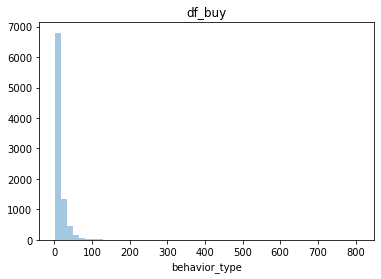

In [96]:
df_buy=df[df.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.distplot(df_buy,kde=False)
plt.title('df_buy')

Text(0.5, 1.0, 'daily_average purchase')

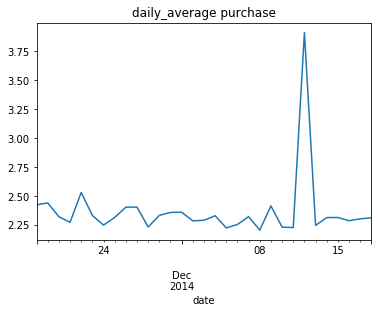

In [98]:
df_buy1=df[df.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
df_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_average purchase')

Text(0.5, 1.0, 'daily_afford_rate')

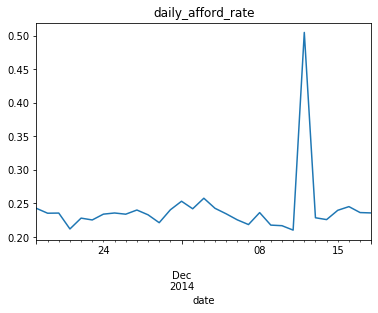

In [84]:
df['operation']=1
df_buy2=df.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index().rename(columns={'operation':'total'})
df_buy2.groupby('date').apply(lambda x:x[x.behavior_type==4].total.count()/len(x.user_id.unique())).plot()
plt.title('daily_afford_rate')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

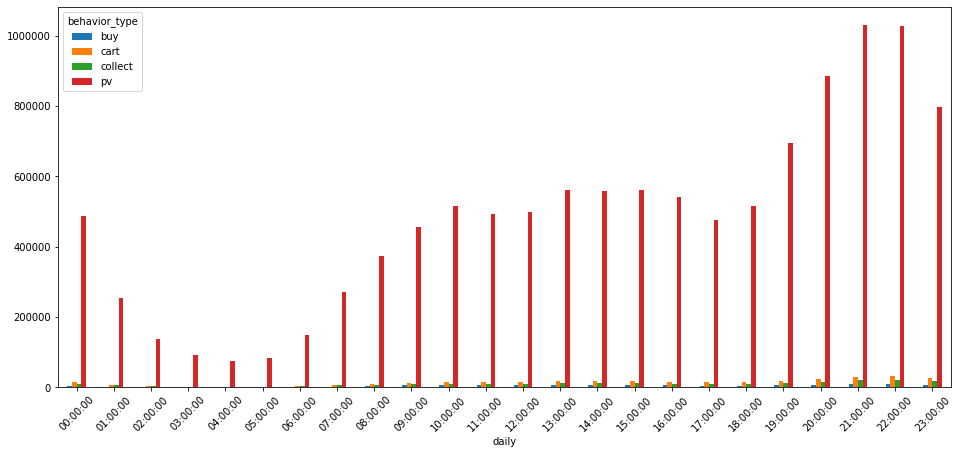

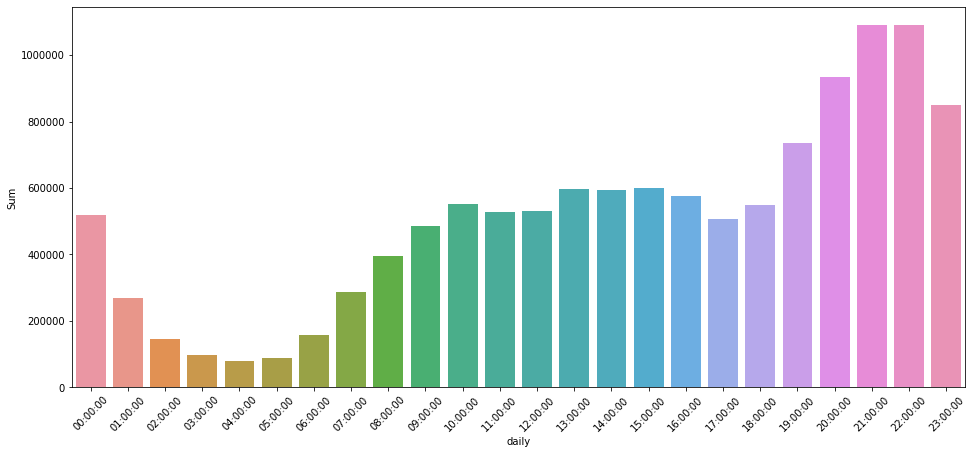

In [85]:
behavior = {1:'pv',2:'collect',3:'cart',4:'buy'}
df['behavior_type'] = df['behavior_type'].replace([1,2,3,4],['pv','collect','cart','buy'])

table_time = df.groupby(['daily','behavior_type']).size().unstack()
table_time1 = df.pivot_table(index='daily',columns='behavior_type',aggfunc='count',margins=True,margins_name='Sum')
table_time1 = table_time1['date']

table_time.plot.bar(stacked=False,rot=45,figsize=(16,7))
plt.figure(figsize=(16,7))
sns.barplot(x=table_time1.index[:-1],y = table_time1['Sum'][:-1])
plt.xticks(rotation=45)


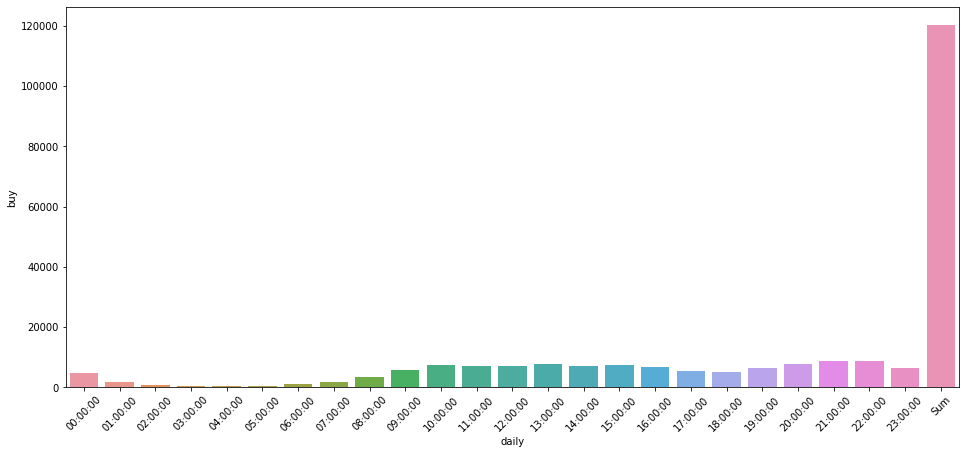

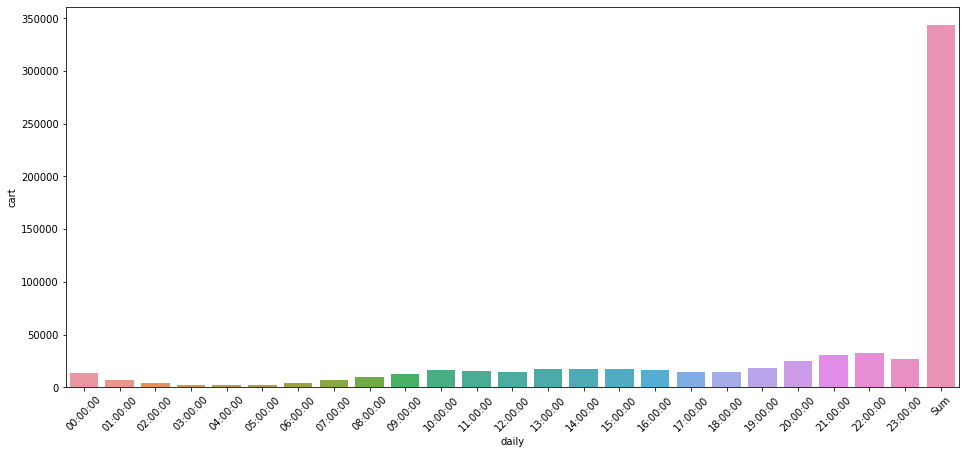

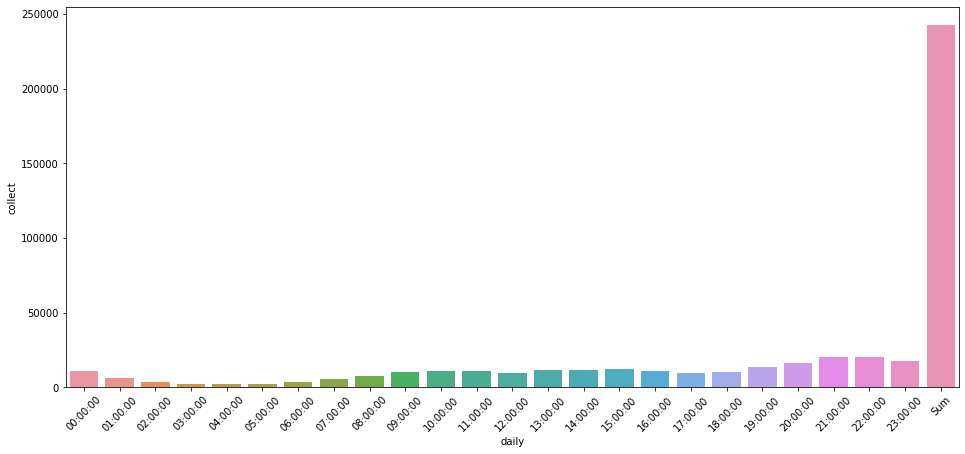

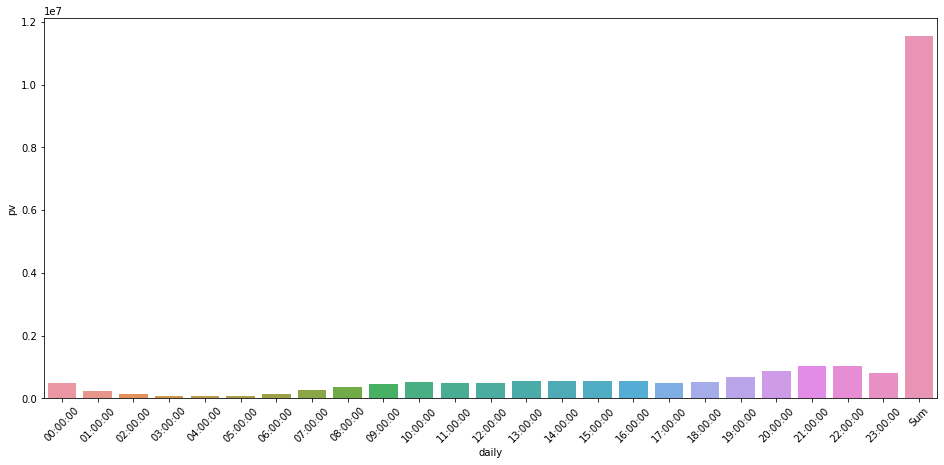

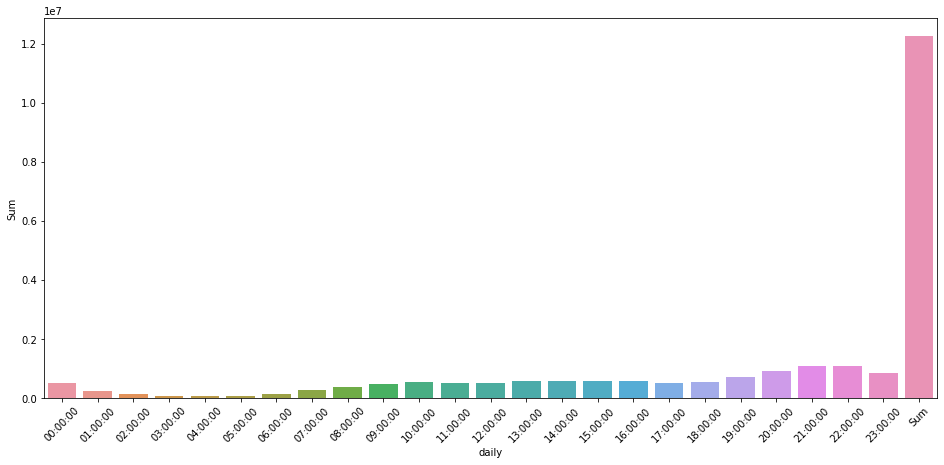

In [86]:
for i in table_time1.columns:
    plt.figure(figsize=(16,7))
    sns.barplot(x=table_time1.index,y = table_time1[i])
    plt.xticks(rotation=45)


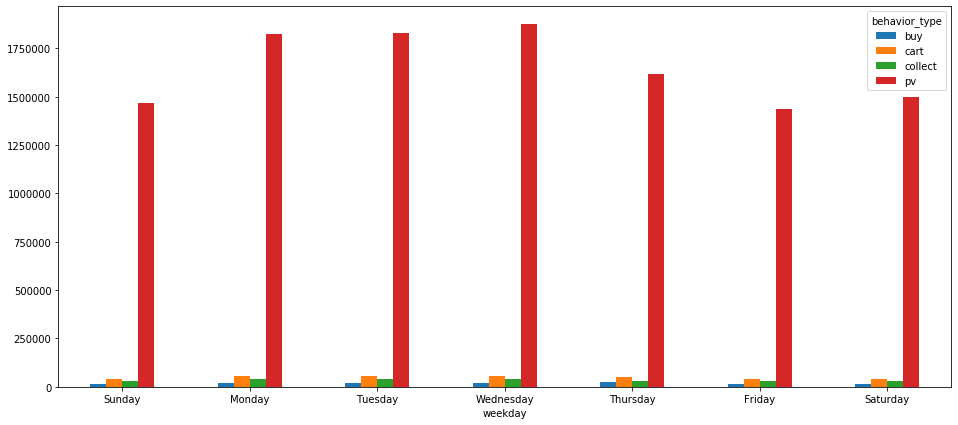

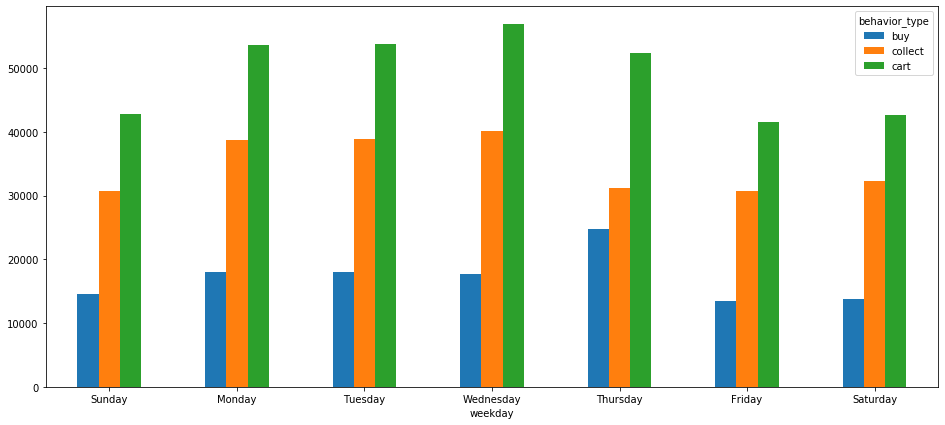

In [87]:
table_week = df.groupby(['weekday','behavior_type']).size().unstack().reset_index()
table_week['weekday'] = table_week['weekday'].replace([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
table_week = table_week.set_index('weekday')
table_week.plot.bar(rot=0,figsize=(16,7))

week_withoutpv = table_week.loc[:,['buy','collect','cart']]
week_withoutpv.plot.bar(rot=0,figsize=(16,7))